In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def powers_of_features(x,k):
  X = x.reshape(len(x),1)
  for i in range(1,k):
    X = np.column_stack((X, x*X[:,-1]))
  return X

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def add_one_end_rows(X):
  return np.column_stack((X, np.ones(X.shape[0])))

def best_lin(X,y,la=0):
  C = add_one_end_rows(X)
  H = np.eye(X.shape[1]+1)
  H[X.shape[1],X.shape[1]] = 0
  A = np.matmul(C.T,C) + la*H
  r = np.dot(C.T,y)
  z = np.linalg.solve(A,r)
  w = z[:-1]
  b = z[-1]
  return w, b  

def best_polynomial(x,y,d,la = 0):
  X = powers_of_features(x,d)
  X_scaled, X_mean, X_std = scale(X)
  y_scaled, y_mean, y_std = scale(y)
  w, b = best_lin(X_scaled,y_scaled,la)
  return w, b, X_mean, X_std, y_mean, y_std

def scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  x_scaled = (x-X_train_mean)/X_train_std
  y_hat_scaled = np.matmul(x_scaled,w) + b
  return y_hat_scaled  
  
def predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  y_hat_scaled = scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std)
  y_hat = y_train_std*y_hat_scaled + y_train_mean
  return y_hat
  
def predictions_polynomial(x, w, b, X_mean, X_std, y_mean, y_std):
  X = powers_of_features(x,len(w))
  return predictions(X, w, b, X_mean, X_std, y_mean, y_std)  

def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_test(X,y,prop_train):
  n = int(prop_train*len(X))
  return X[:n],y[:n],X[n:],y[n:]  

def mean_square_error(y,y_hat,y_mean,y_std):
  y_scaled = (y-y_mean)/y_std
  y_hat_scaled = (y_hat-y_mean)/y_std
  return np.sum((y_scaled - y_hat_scaled)**2)/len(y)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/to fit poly.csv')

In [ ]:
x = df['features'].values
y = df['labels'].values

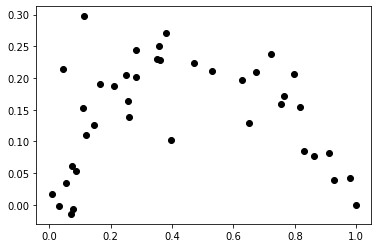

In [23]:
x_train = np.random.random(40)
er = np.random.randn(40)
x_validation = np.random.random(20)
vr = np.random.randn(20)
y_train = x_train*(1-x_train) +0.06*er
y_validation = x_validation*(1-x_validation) +0.06*vr
plt.plot(x_train,y_train,'ko')

In [ ]:
x, y = shuffle_examples(x,y)
p = 0.8
x_train, y_train, x_validation, y_validation = split_train_test(x,y,p)

In [31]:
d=30
J = np.empty(0)
las = np.arange(0,1,0.01)
for la in las:
  w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,la)
  y_hat_validation = predictions_polynomial(x_validation, w, b, X_mean, X_std, y_mean, y_std)
  J = np.append(J,mean_square_error(y_validation,y_hat_validation,y_mean,y_std)) 

Text(0, 0.5, '$J_{reg}$')

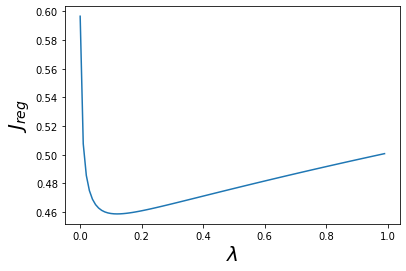

In [49]:
plt.plot(las,J)
plt.xlabel('$\lambda$',fontsize=20)
plt.ylabel('$J_{reg}$',fontsize=20)

In [39]:
print(J[12],J[13],las[12])

0.458749486765761 0.45880128413152194 0.12


Text(0, 0.5, 'label')

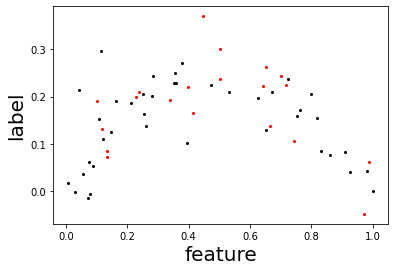

In [50]:
z = np.arange(0,1,0.01)

plt.plot(x_train,y_train,'ko',markersize=2)
plt.plot(x_validation,y_validation,'ro',markersize=2)

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,0)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(z,u,'g')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,0.12)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(z,u,'r')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,10)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(z,u,'b')

plt.xlabel('feature',fontsize=20)
plt.ylabel('label',fontsize=20)

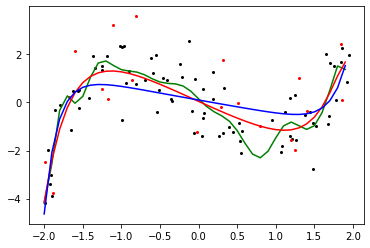

In [ ]:
z = np.arange(-2,2,0.1)

plt.plot(x_train,y_train,'ko',markersize=2)
plt.plot(x_validation,y_validation,'ro',markersize=2)

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,0)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'g')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,1.26)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'r')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d,20)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'b')
